# Pytrends

In [1]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/
# guia para funções pandas

In [3]:
# INSTALAÇÕES USADAS
!pip install pytrends
!pip install pyodbc

In [1]:
#IMPORTAÇÕES USADAS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import timezone, datetime, timedelta, date
import seaborn as sns
sns.set()## NECESSÁRIO?
import requests## NECESSÁRIO?
import pyodbc## NECESSÁRIO?
import hashlib## NECESSÁRIO?
from pytrends.request import TrendReq
pytrends = TrendReq(hl='pt-BR', tz=360)
import json ## NECESSÁRIO?

In [2]:
# FORMATAÇÃO CONDICIONAL
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: lightblue' if v else '' for v in is_max]
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color
#df.style.applymap(color_negative_red).apply(highlight_max)

In [3]:
print ('Essas são as tendências do dia')
hoje = pytrends.trending_searches(pn='brazil') #cuidado pq em outras estava pytrends
print (hoje.head(10))

Essas são as tendências do dia
                        0
0            Phoenix Suns
1       Rua do Medo: 1978
2          Hugo Rodallega
3           Thyane Dantas
4     Permission to Dance
5           Florence pugh
6  Vacina Janssen reações
7        Remo x Vila Nova
8               Fortaleza
9             Viuva Negra


In [4]:
# ------------------------------
## ESTUDAR ESSA PARTE
termo = "bidi11"
 
suggestions_dict = pytrends.suggestions(keyword=termo)
pd.DataFrame(data=suggestions_dict).drop('mid', axis=1).head(2)

,title,type
0,BVMF:BIDI11,Assunto


In [11]:
# ------------------------------
## ESTUDAR ESSA PARTE
pytrends.build_payload('saude', cat=0, timeframe='today 5-y', geo='', gprop='')

In [15]:
# ------------------------------
## ESTUDAR ESSA PARTE
kw_list = ["bidi11"]
print(pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop=''))
#no exemplo estava sem o print acima

None


In [14]:
keywords = ['Bidi4', 'Bidi11','Itub3' ,'Itub4', 'Bbas3']

#calculando dia de hoje
data_atual = date.today()
time_frame = str(date.today() -  timedelta(weeks=52))+ " " +str(date.today())

pytrends.build_payload(keywords, timeframe=time_frame)
data = pytrends.interest_over_time()
data = data.drop('isPartial', axis=1)
 
data.head(2)

,Bidi4,Bidi11,Itub3,Itub4,Bbas3
date,,,,,
2020-07-12,23,5,6,22,38
2020-07-19,16,4,8,26,50


In [16]:
data['ano/mes'] = ""

In [17]:
data['ano/mes'] = data.index.strftime('%y/%m')

In [18]:
data.head(5)

,Bidi4,Bidi11,Itub3,Itub4,Bbas3,ano/mes
date,,,,,,
2020-07-12,23,5,6,22,38,20/07
2020-07-19,16,4,8,26,50,20/07
2020-07-26,19,4,8,28,49,20/07
2020-08-02,16,3,9,47,59,20/08
2020-08-09,14,5,10,31,42,20/08


In [19]:
data2 = round(data[['ano/mes', 'Bidi4','Bidi11', 'Itub3', 'Itub4',"Bbas3"]].groupby(['ano/mes'])\
.mean()).sort_values(by='ano/mes', ascending=True)

In [52]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 20/06 to 21/06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bidi4   13 non-null     float64
 1   Bidi11  13 non-null     float64
 2   Itub3   13 non-null     float64
 3   Itub4   13 non-null     float64
 4   Bbas3   13 non-null     float64
dtypes: float64(5)
memory usage: 624.0+ bytes


In [20]:
data2 = data2.astype(int)

In [21]:
data2.style.apply(highlight_max)

,Bidi4,Bidi11,Itub3,Itub4,Bbas3
ano/mes,,,,,
20/07,19,4,7,25,46
20/08,15,5,9,33,47
20/09,11,2,6,22,39
20/10,8,2,6,21,38
20/11,9,3,6,26,38
20/12,8,4,4,16,33
21/01,17,8,6,21,48
21/02,12,6,4,25,62
21/03,10,4,4,18,53


## Pesquisar sobre impressão de rótulos no gráfico de linhas

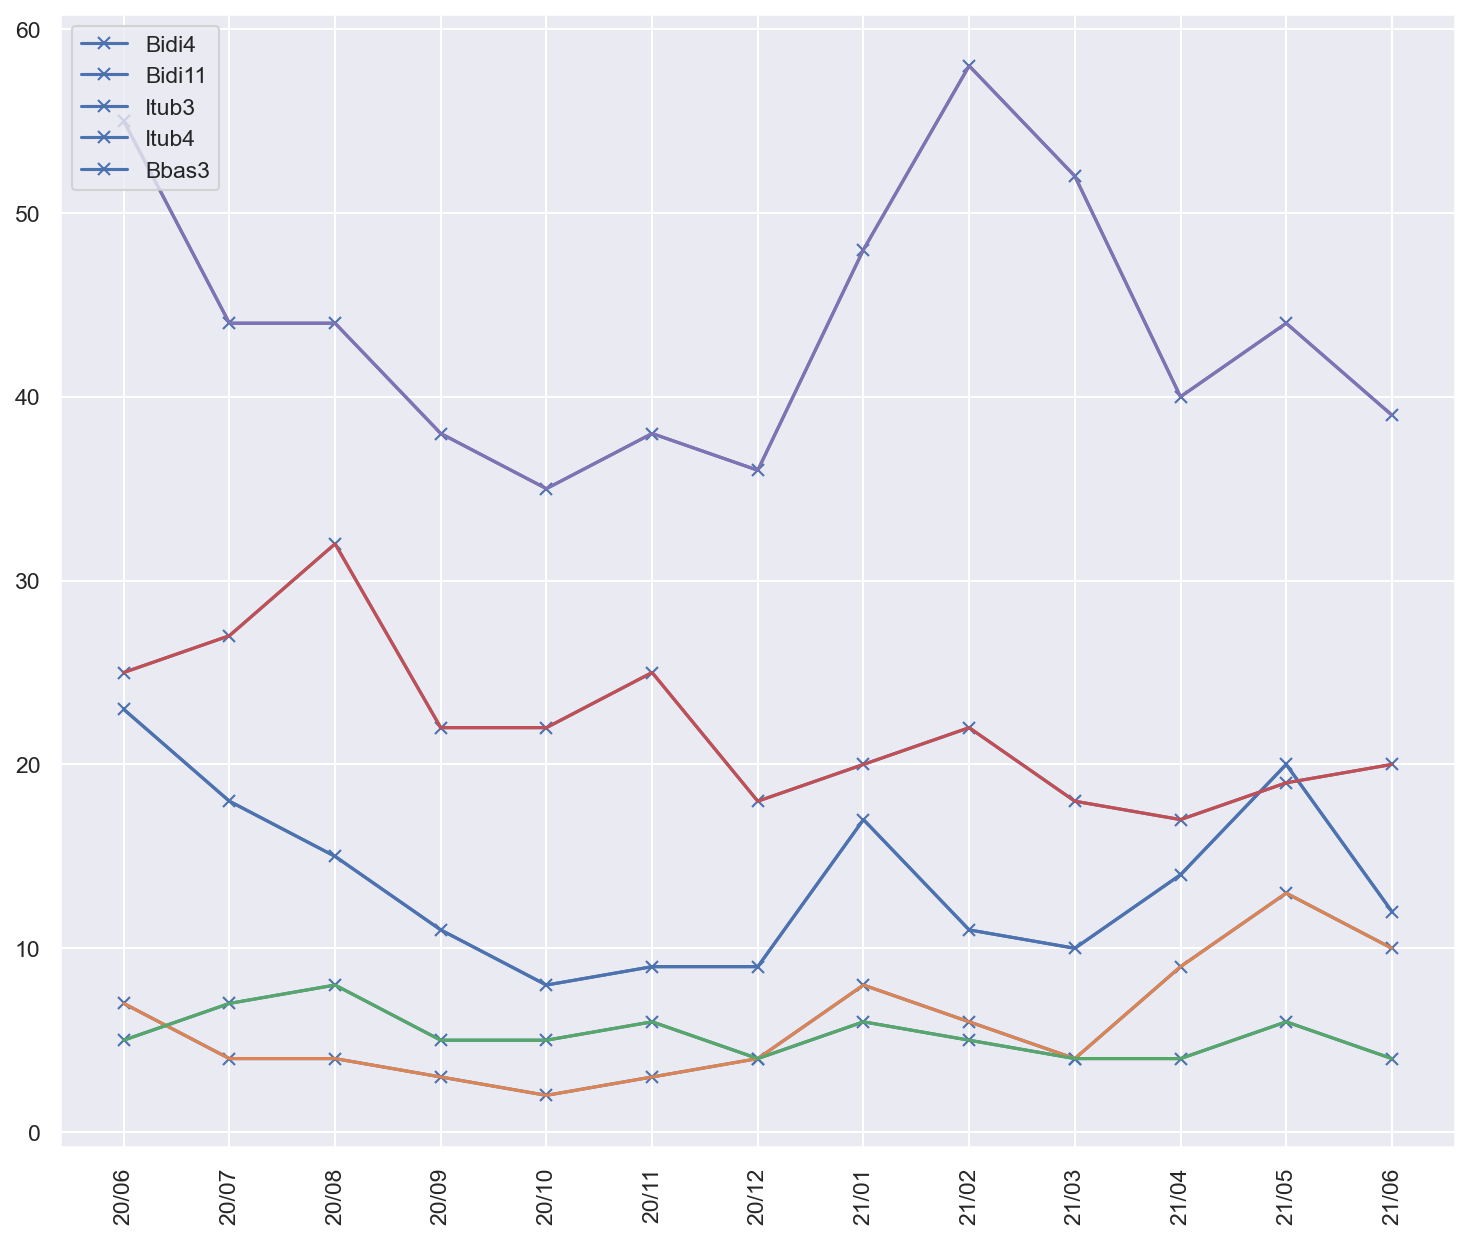

In [23]:
#plot data
plt.figure(figsize=(12,10), dpi=150)
plt.plot(data2, marker='x', markersize=6, color='b')
plt.plot(data2)

#add titles
#plt.suptitle('Programming Language Searches on Google Trends')
#plt.xlabel('years')                       
#plt.ylabel('weekly searches')  

#add legend
plt.legend(keywords, loc='upper left')
plt.xticks(rotation=90)

plt.show()
## para salvar imagem
#plt.savefig('best_language.png')

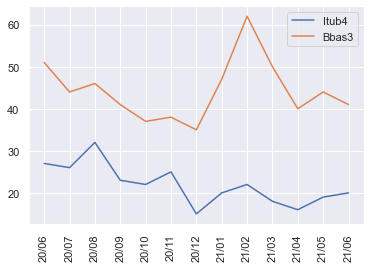

In [89]:
#outra forma de falicitar plotar gráfico
focus = ['Itub4', 'Bbas3']
 
plt.plot(data2[focus])
plt.legend(focus)
plt.xticks(rotation=90)
plt.show()

In [99]:
#extract country-level kewords search data
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the highest searches of "Python"
porpais = country_data['Bbas3'].nlargest(10)

#convert to dataframe
porpais = porpais.to_frame()

porpais

,Bbas3
geoName,
Austrália,67
Espanha,67
Alemanha,57
Japão,57
Brasil,49
Portugal,36
Estados Unidos,34
Canadá,33
Argentina,31


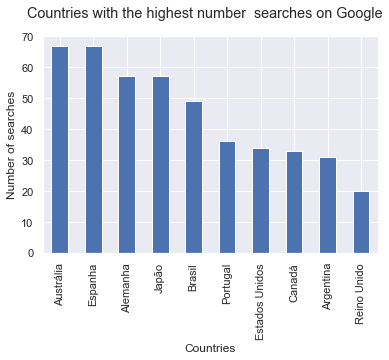

In [101]:
#plot a bar chart
porpais.plot(kind='bar', legend=None)

#titles
plt.suptitle('Countries with the highest number  searches on Google')
plt.ylabel('Number of searches')
plt.xlabel('Countries')

plt.show()

### PESQUISAS ALEATÓRIAS

In [118]:
# Get Google Keyword Suggestions
termo = 'betim'
pytrends.build_payload(kw_list=[(str(termo))])
suggestions_dict = pytrends.suggestions(keyword=termo)
pd.DataFrame(data=suggestions_dict).drop('mid', axis=1)

,title,type
0,Betim,Município em Minas Gerais
1,Prefeitura de Betim,Assunto
2,Imagery,Assunto
3,Juramento,Assunto
4,Ipatinga Futebol Clube,Clube de futebol


In [121]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrends.related_queries()
pd.DataFrame(data=related_queries_dict[termo]['top'].head(20))

,query,value
0,betim mg,100
1,betim prefeitura,46
2,prefeitura de betim,44
3,tempo betim,38
4,olx betim,31
5,shopping,26
6,betim shopping,25
7,partage betim,23
8,cep betim,15
9,vagas betim,14


In [125]:
pd.DataFrame(data=related_queries_dict[termo]['rising'].head(20))


,query,value
0,concurso betim 2019,21550
1,copart betim,16350
2,upa norte betim,8450
3,betim rural 2017,7150
4,prime show betim,6950
5,fretebras contagem,6650
6,petz betim,6450
7,amor saude betim,5950
8,materdei betim contagem,4500
9,ava ifmg betim,3700


In [126]:
related_topic = pytrends.related_topics()
related_topic[termo]['rising'].drop(['link','topic_mid'], axis=1)#.head(20)

,value,formattedValue,topic_title,topic_type
0,26250,Aumento repentino,OLX Brasil,Assunto
1,13700,Aumento repentino,Hospital Regional,Assunto
2,3800,Mais 3.800%,Rede Mater Dei de Saúde - Mater Dei Betim-Cont...,Assunto
3,3200,Mais 3.200%,Partido Trabalhista Brasileiro,Assunto
4,3000,Mais 3.000%,Partido Trabalhista Brasileiro,1981
5,1400,Mais 1.400%,Partage Shopping Betim,"Centro de compras em Betim, Minas Gerais"
6,1350,Mais 1.350%,Centro comercial,Assunto
7,600,Mais 600%,Cineart,Assunto
8,550,Mais 550%,Cineart Shopping Monte Carmo,"Cinema em Betim, Minas Gerais"
9,350,Mais 350%,Alterosa,Assunto


In [22]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=['brasil'])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
print(interest_over_time_df.tail(10))

            brasil isPartial
date                        
2021-05-02      30     False
2021-05-09      29     False
2021-05-16      29     False
2021-05-23      30     False
2021-05-30      56     False
2021-06-06      57     False
2021-06-13      57     False
2021-06-20      54     False
2021-06-27      63     False
2021-07-04      81      True


<AxesSubplot:xlabel='date'>

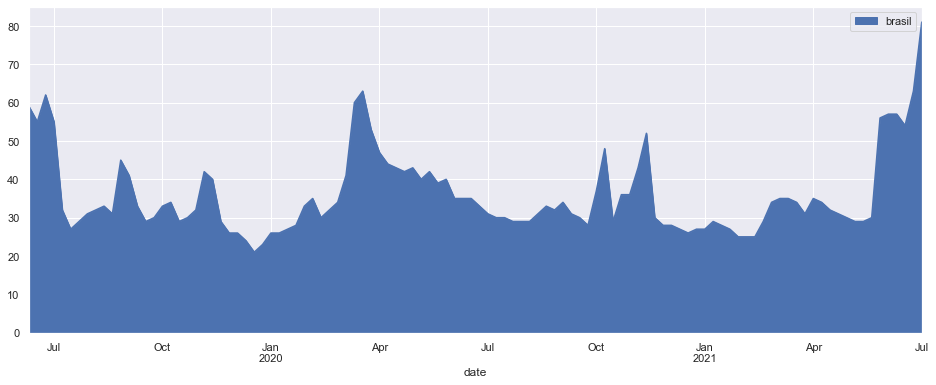

In [23]:
import matplotlib
from matplotlib import pyplot as plt
interest_over_time_df[interest_over_time_df.index>=datetime(2019,6,15)]\
.pivot_table(values=['brasil'], index='date')\
.plot(kind='area', stacked=True, figsize=(16,6))


# PYTRENDS COM AÇÕES
#### IMPORTANDO PARA COMPRREENDER
#### JAMAIS É UMA RECOMENDAÇÃO / APENAS PARA FINS DE ESTUDO

In [24]:
#!pip install pytrends
!pip install pyodbc
!pip install pandas_datareader

In [25]:
import pandas as pd
from pandas_datareader import data as web
import numpy as np
import datetime
import seaborn as sns
sns.set()
from pytrends.request import TrendReq
pytrends = TrendReq(hl='pt-BR', tz=360)

In [138]:
kw_list = ["bidi11"]
print(pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop=''))

None


In [26]:
keywords = ['Bbas3'] #nome do ativo

#calculando dia de hoje
data_atual = date.today()
#time_frame = str(date.today() -  timedelta(weeks=52))+ " " +str(date.today())
time_frame = "2021-01-01 " +str(date.today())

pytrends.build_payload(keywords, timeframe=time_frame)
df1 = pytrends.interest_over_time()
df1 = df1.drop('isPartial', axis=1)
 
df1.head(5)

,Bbas3
date,
2021-01-01,0
2021-01-02,0
2021-01-03,3
2021-01-04,21
2021-01-05,21


In [27]:
df2 = pd.DataFrame()
# escolher a ação desejada
acao = 'Bbas3.SA' #nome do ativo seguido.SA
 
# importar dados para o DataFrame
df2 = web.DataReader(acao, data_source='yahoo', start='2021-01-01')
 
# ver as  primeiras entrada
df2 = df2.drop('Low', axis=1) 
df2 = df2.drop('High', axis=1) 
df2 = df2.drop('Open', axis=1) 
df2 = df2.drop('Volume', axis=1) 
df2 = df2.drop('Adj Close', axis=1) 
#df = df.rename(columns={'Close':'PreçoFechamento})
df2['data'] = df2.index
df2 = df2.drop('data', axis=1) 

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/Bbas3.SA/history?period1=1609484400&period2=1625900399&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [ ]:
df2

In [207]:
df_final= pd.concat([df1, df2], axis=1, join='inner')

In [208]:
df_final.columns = ['GooTrends', 'Preço']
df_final['GooTrends'] = round(df_final['GooTrends'],2)
df_final['Preço'] = round(df_final['Preço'],2)

In [190]:
df_final.style.applymap(color_negative_red).apply(highlight_max)

,GooTrends,Preço
2021-01-04 00:00:00,23,37.590000
2021-01-05 00:00:00,28,37.200000
2021-01-06 00:00:00,40,38.050000
2021-01-07 00:00:00,34,39.560000
2021-01-08 00:00:00,29,39.790000
2021-01-11 00:00:00,34,39.140000
2021-01-12 00:00:00,26,39.500000
2021-01-13 00:00:00,33,37.550000
2021-01-14 00:00:00,63,37.460000
2021-01-15 00:00:00,53,36.300000


<AxesSubplot:title={'center':'Bbas3.SA'}>

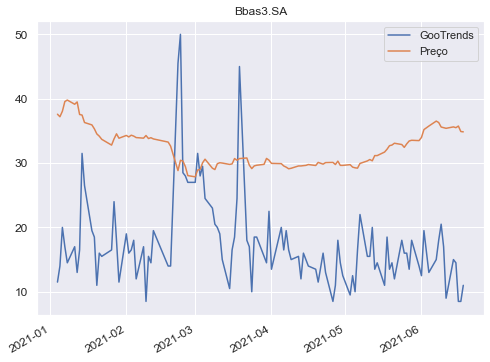

In [198]:
df_final.plot(figsize=(8, 6),title=acao, fontsize=12)

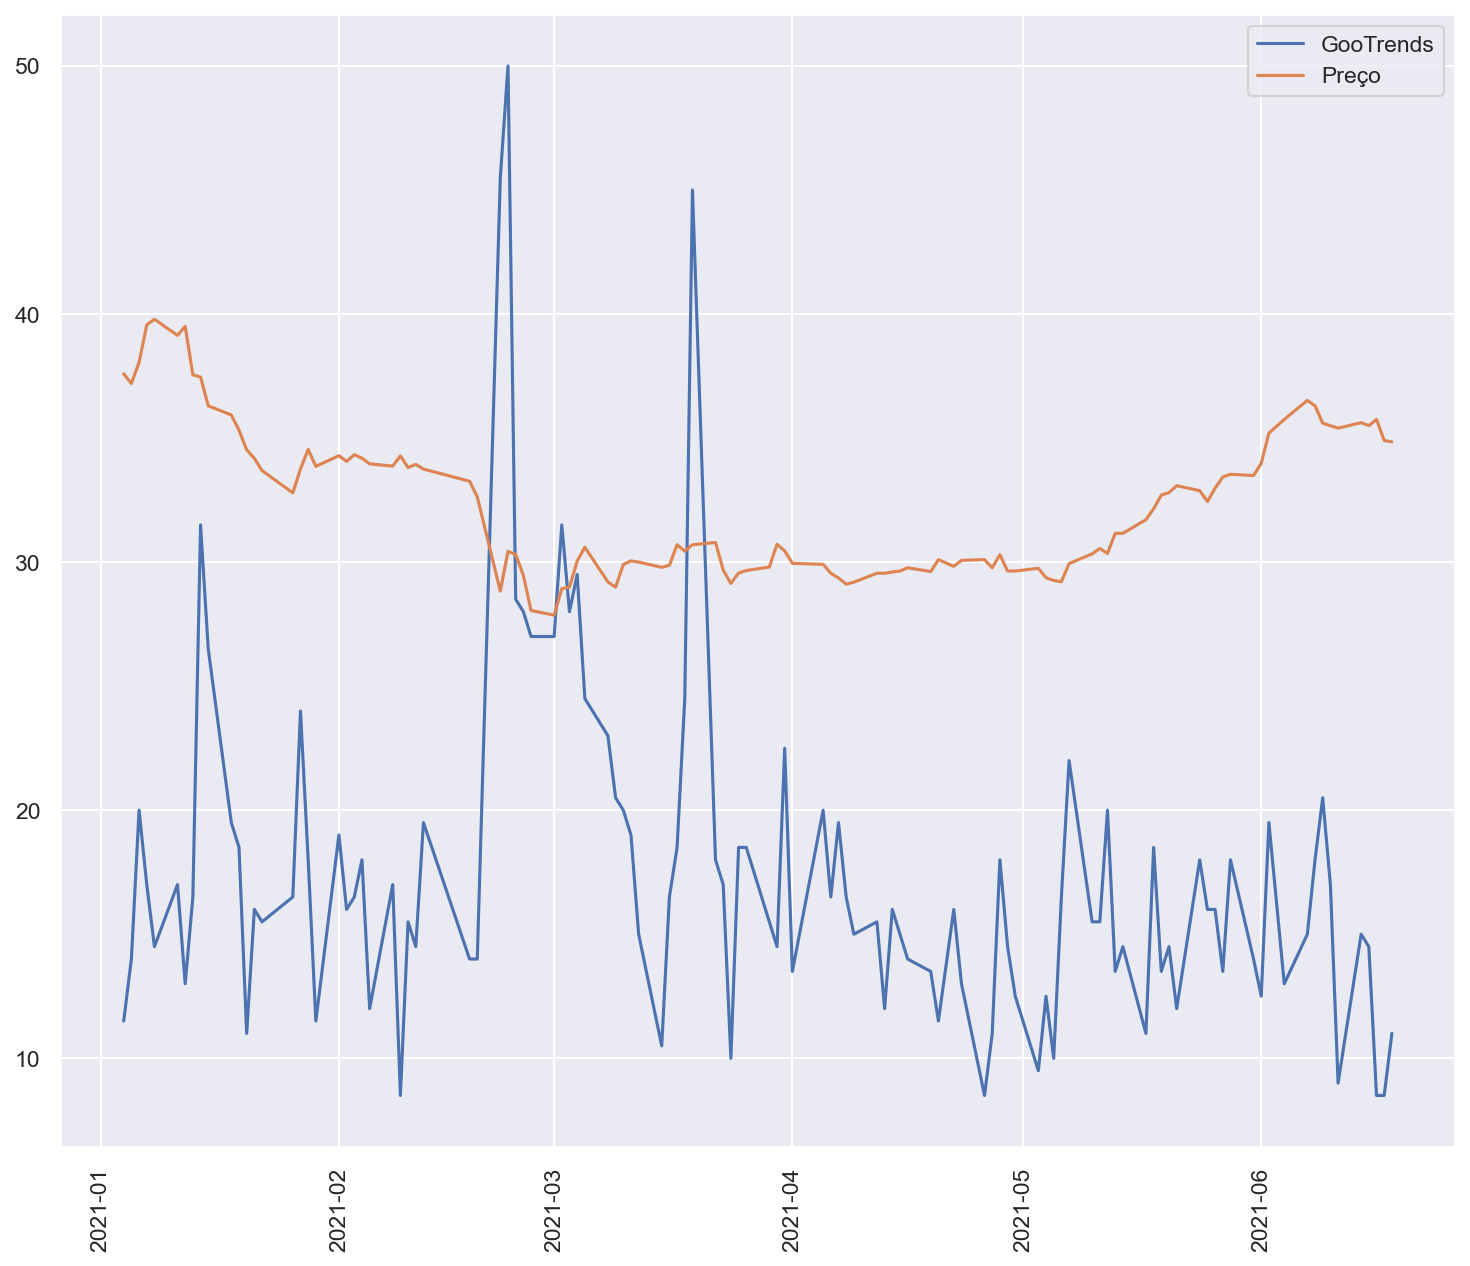

In [197]:
plt.figure(figsize=(12,10), dpi=150)
#plt.plot(df_final, marker='o', markersize=3, color='b')
plt.plot(df_final)

#add titles
#plt.suptitle('Programming Language Searches on Google Trends')
#plt.xlabel('years')                       
#plt.ylabel('weekly searches')  

#add legend
plt.legend(df_final, loc='best')
plt.xticks(rotation=90)

plt.show()
## para salvar imagem
#plt.savefig('best_language.png')

In [200]:
df_final['Ano/mês']=""
df_final['Ano/mês'] = df_final.index.strftime('%y/%m')

In [201]:
df_final

,GooTrends,Preço,Ano/mês
2021-01-04,11.5,37.59,21/01
2021-01-05,14.0,37.20,21/01
2021-01-06,20.0,38.05,21/01
2021-01-07,17.0,39.56,21/01
2021-01-08,14.5,39.79,21/01
...,...,...,...
2021-06-14,15.0,35.62,21/06
2021-06-15,14.5,35.50,21/06
2021-06-16,8.5,35.75,21/06
2021-06-17,8.5,34.90,21/06


In [202]:
Correlacionados = round(df_final[['Ano/mês', 'GooTrends','Preço']].groupby(['Ano/mês'])\
.mean()).sort_values(by='Ano/mês', ascending=True)

In [203]:
# verá a media mensal
Correlacionados

,GooTrends,Preço
Ano/mês,,
21/01,17.0,36.0
21/02,21.0,33.0
21/03,21.0,30.0
21/04,15.0,30.0
21/05,15.0,32.0
21/06,14.0,35.0


In [204]:
import seaborn as sns

<AxesSubplot:>

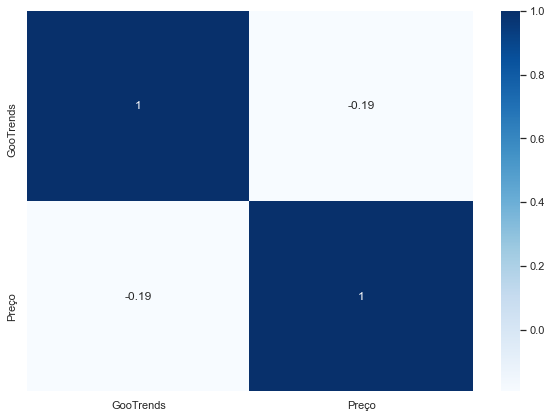

In [209]:
#diário
plt.figure(figsize=(10,7))

sns.heatmap(df_final[['GooTrends', 'Preço']].corr(), 
            cmap='Blues', annot=True)

<AxesSubplot:>

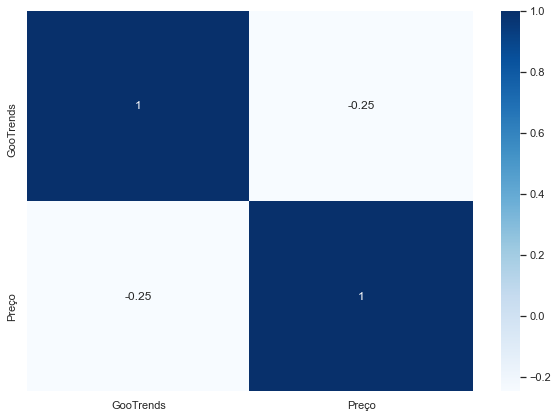

In [210]:
#mensal médias
plt.figure(figsize=(10,7))

sns.heatmap(Correlacionados[['GooTrends', 'Preço']].corr(), 
            cmap='Blues', annot=True)

In [34]:
data_atual = date.today()
print(data_atual)

2021-06-21


In [41]:
time_frame = '2016-12-14 '+ str(date.today())

In [47]:
date.today() -  timedelta(weeks=52)

datetime.date(2020, 6, 22)